#  Proyecto de Análisis de Datos de Videojuegos para Ice

## Descripcion del proyecto

La tienda online Ice busca optimizar sus estrategias de venta de videojuegos a través de un análisis profundo de los datos disponibles.

Este proyecto tiene como objetivo identificar patrones que determinen el éxito de un juego, utilizando una amplia gama de datos que incluyen reseñas de usuarios y expertos, géneros, plataformas, y cifras históricas de ventas. Con estos insights, se busca apoyar a la deteccion de proyectos prometedores y la planificacion de campañas publicitarias más efectivas.

El análisis se centra en datos que abarcan hasta diciembre de 2016, permitiéndonos imaginar un escenario en el que estamos planificando las estrategias de 2017 basándonos en esta información. Una parte crucial del análisis incluye la clasificación ESRB de cada juego, que evalúa el contenido y asigna una clasificación de edad, influyendo directamente en la percepción y ventas de los títulos.



## Preparacion de los datos

Importaremos las librerias con las que trabajaremos, y observaremos que datos tenemos asi como si requieren cambios o correciones

In [235]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [236]:
# Lectura de los datos 
games_data = pd.read_csv("/datasets/games.csv")

# Informacion y datos descriptivos
display(games_data.info())
games_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [237]:
# Visualizacion de la tabla
games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Hemos visto que tenemos un dataframe con informacion sobre juegos, su nombre, plataforma, año de lanzamiento, genero, ventas en; norteamerica, europa, japon y otras en millones de dolares estadounidenses, asi como una calificacion de los criticos o profesionales y de los usuarios, por ultimo que clasificacion ESRB tiene.

El dataframe tiene tipos de datos incorrectos como la mezcla de mayusculas y minusculas para las columnas, el tipo de dato incorrecto para los contenidos de la tabla y valores ausentes. Se corregira el tipo de datos incorrectos y segun nuestras necesidades eliminaremos, imputaremos o dejaremos en nan los valores ausentes.

Para user_score tenemos que los datos son cadenas de texto esto debido a el valor en los datos "tbd" que significa "to be determined" (a determinar). Por lo que se remplasarian por valores nan ya que tbd no aporta informacion y tampoco podemos tener dos tipos de datos en una sola columna en este caso cadenas de texto y numeros decimales

Tambien añadiremos una nueva columna que sea "total_sales" la cual contenga la venta total de cada juego, es decir la suma de las ventas de sus regiones.

Debido al tipo de valores ausentes que tenemos, solo imputamos con 0 el año de lanzamiento de aquellas filas de datos con nan para poder corregir al tipo de dato correcto (int), esto debido a que no podemos eliminar como tal las filas con valores ausentes ya que perderiamos mucha informacion, lo que modificaria el resultado del analisis e imputar los datos con algun estadistico sesgaria los resultados hacia el valor del estadistico. En el caso de de las reseñas de usuario, profesionales y la calificacion ESRB la ausencia de datos puede deberse a que aun no han sido evaluados lo suficiente para asignar un valor para ellas, de igual forma pero aun mas significativo, la imputacion no es posible debido a que puede sesgar los datos hacia el estadistico con el que sean imputados, un ejemplo, si imputaramos las reseñas con un estadistico y que el valor del mismo este por debajo de 5 para los usuarios o 50 para los profesionales, estariamos de alguna forma suponiendo que, algunos juegos fueron calificados como malos, aunque tengan ventas totales altas lo que considerariamos que fue un juego exitoso,sin embargo ´por su calificacion se consideraria un mal juego, lo que no tendria mucho sentido. Tambien, la imputacion podria sesgar la correlacion entre las ventas y calificaciones de un juego.

In [238]:
# Convertir a minusculas
games_data.columns = games_data.columns.str.lower()

# Llenar los valores nan en año de lanzamiento con 0
games_data["year_of_release"].fillna(0, inplace=True)

# Corregir al tipo de dato correcto
games_data["year_of_release"] = games_data["year_of_release"].astype("int")

In [240]:
# Cambiar "tbd" a valores nan 
games_data.loc[games_data["user_score"] == "tbd", "user_score"] = np.nan

# Corregir al tipo de dato correcto
games_data["user_score"] = games_data["user_score"].astype("float")

In [239]:
# Agregar columna total_sales
games_data["total_sales"] = games_data[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)

In [241]:
display(games_data.info())
games_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Con esto procedemos a realizar el analisis

## Analisis general

Queremos conocer como ha cambiado el comportamiento del numero de juegos lanzados por año, lo que por logica al lanzarse mas juegos directamente podriamos tener mas ventas totales. Ademas analizaremos a las plataformas con mas ventas y veremos como han evolucionado esas ventas a lo largo del tiempo

### Juegos por año

Haremos un grafico para visualizar y analizar el numero de juegos lanzados por año.

In [242]:
# Juegos lanzados por año
games_per_year = games_data.groupby("year_of_release")["name"].count().reset_index()
# Juegos lanzados por año filtrando aquellos que no tenemos dato para su fecha de lanzamiento
games_per_year = games_per_year.query("year_of_release != 0")

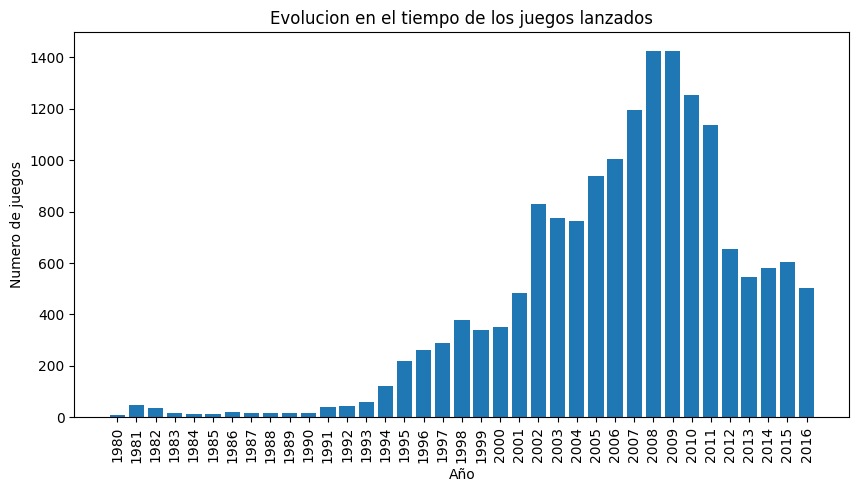

In [243]:
# Grafico de evolucion en el tiempo del numero de juegos lanzados
plt.figure(figsize = (10,5))
plt.bar(games_per_year["year_of_release"], games_per_year["name"])
plt.title("Evolucion en el tiempo de los juegos lanzados")
plt.ylabel("Numero de juegos")
plt.xlabel("Año")
plt.xticks(games_per_year.year_of_release, rotation=90)
plt.show()

Podemos ver como el numero de juegos lanzados por año ha cambiado con respecto al tiempo, teniendo un crecimiento notable a partir de 1993, siendo los años del 2002 al 2012 la etapa donde mas juegos fueron lanzados.

### Ventas por plataforma

Analizaremos las ventas por plataformas, por lo que tomamos los datos de las 10 con mas ventas y veremos su comportamiento a lo largo del tiempo de vida de la misma.

In [244]:
# Ventas por plataforma
sales_per_platform = games_data.groupby("platform")["total_sales"].sum().sort_values(ascending=False).reset_index()

# Top 10 plataformas con mayores ventas
top_10_sales_per_platform = sales_per_platform.loc[:9]
platform_list = top_10_sales_per_platform["platform"]
platform_list

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     GBA
7     PS4
8     PSP
9      PC
Name: platform, dtype: object

In [245]:
# Ventas de las plataforma seleccionadas por año 
sales_per_platform_year = games_data.groupby(["year_of_release", "platform"])["total_sales"].sum().reset_index()
sales_per_platform_year = sales_per_platform_year.query("year_of_release != 0 and platform in @platform_list")

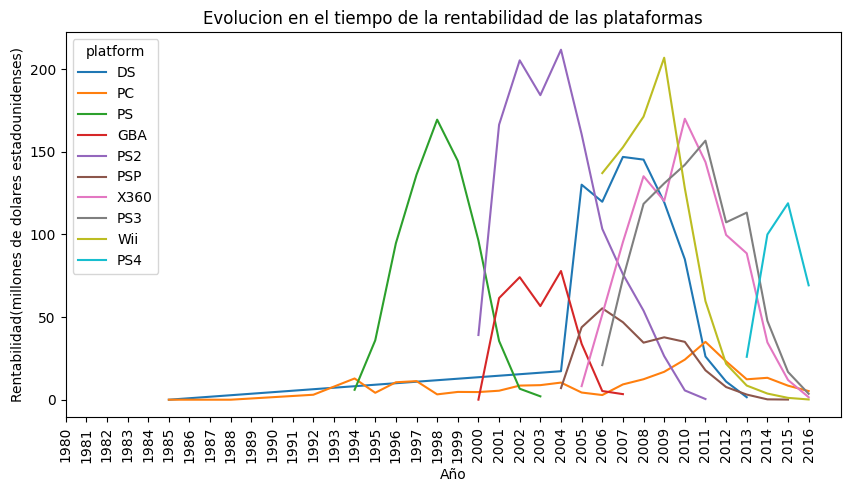

In [246]:
plt.figure(figsize = (10,5))
sns.lineplot(data= sales_per_platform_year, x= "year_of_release", y= "total_sales", hue= "platform")
plt.title("Evolucion en el tiempo de la rentabilidad de las plataformas")
plt.ylabel("Rentabilidad(millones de dolares estadounidenses)")
plt.xlabel("Año")
plt.xticks(games_per_year.year_of_release, rotation=90)
plt.show()

Con este grafico tenemos una vista de la evolucion de las plataformas, podemos ver que todas tienen una tendencia a crecer y despues de unos años caer, esto puede deberse a diferentes factores como que la plataforma quede obsoleta por la salida de nuevos juegos que requieran mas potencia, o que salga un nuevo sucesor para cierta plataforma como el caso de Playstation y Xbox con su linea de consolas. Podemos ver que PC es de las mas antiguas y sigue vigente hasta la fecha en que se tomaron los datos.

### Conclusiones importantes del analisis general

El número de juegos lanzados por año ha mostrado un crecimiento significativo desde 1993, alcanzando su punto máximo entre 2002 y 2012. Esto refleja el crecimiento y auge de la industria durante esos años. Las plataformas, en general, siguen un ciclo de crecimiento seguido de declive, influenciado por factores como la obsolescencia y la llegada de nuevas versiones. Sin embargo, la PC sigue manteniéndose relevante a lo largo de los años, a diferencia de otras plataformas.

## Analisis de datos relevantes a partir del 2013

Como anteriormente ya se habia señalado, tenemos datos del 2016 y pretendemos analizarlos para poder planear una campaña para el 2017, de este modo hemos seleccionado los datos de los juegos lanzados a partir del 2013, consideramos que estos años son los mas relevantes y de mayor utilidad para nuestros fines.

### Plataformas lideres y su evolucion en el tiempo

Crearemos una tabla y un grafico de lineas para ver la evolucion del total de ventas anuales de cada plataforma, y de este modo, conocer cuales son las plataformas lideres, cuales crecen, cuales se reducen y cuales son las mas rentables. 

In [247]:
# Datos solo a partir del 2013
games_data_filter = games_data.query("year_of_release >= 2013")

In [248]:
# Tabla pivot con las ventas totales por año del 2013 al 2016 de cada plataforma
leading_platforms = pd.pivot_table(data = games_data_filter, index = "year_of_release", columns = "platform", values = "total_sales", aggfunc = "sum").fillna(0)
leading_platforms

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


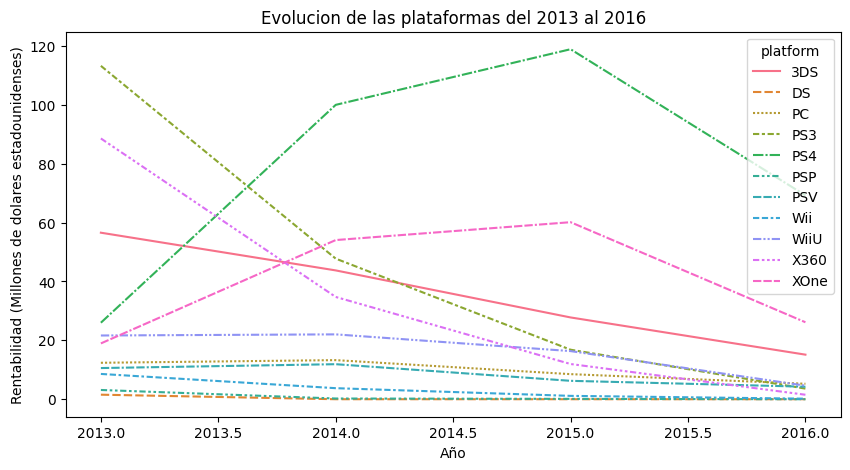

In [249]:
plt.figure(figsize = (10,5))
# Grafico 
sns.lineplot(data = leading_platforms)
plt.title("Evolucion de las plataformas del 2013 al 2016")
plt.ylabel("Rentabilidad (Millones de dolares estadounidenses)")
plt.xlabel("Año")
plt.show()

Podemos ver que PS4 es la plataforma lider con mayor crecimiento, seguida por XboxOne sin tanto crecimiento como PS4 pero si por encima de las demas plataformas. PS3, Xbox360 y Nintendo 3DS empiezan 2013 con ventas altas, PS3 y Xbox360 tienen una caida significativa hasta el 2014 a diferencia de 3DS que su caida es menos pronunciada, todas continuan en descenso lo que sugiere que esas plataformas ya no serian tan rentables.

### Ventas globales de las plataformas

Para tener otra vision de las ventas, haremos diagramas de cajas para cada plataforma.

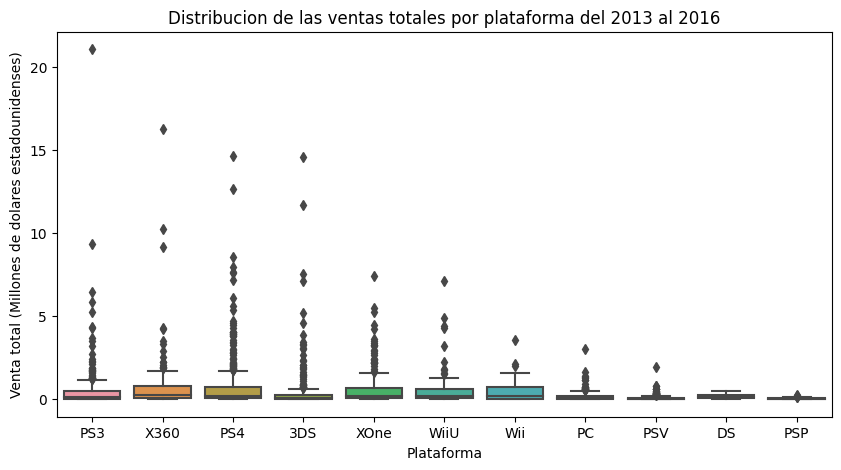

In [250]:
plt.figure(figsize = (10,5))
sns.boxplot(data = games_data_filter, x= "platform", y= "total_sales")
plt.title("Distribucion de las ventas totales por plataforma del 2013 al 2016")
plt.ylabel("Venta total (Millones de dolares estadounidenses)")
plt.xlabel("Plataforma")
plt.show()

Podemos ver outliners bastantes significativos, lo que sugiere que las ventas de un juego en esa plataforma superaron por mucho la media, incluso llegando a recaudar mas de 20 millones de dolares estadounidenses.

Como extra, mostraremos cuales han sido esos juegos con mayores ventas y su plataforma.

In [251]:
top_sales_games = games_data_filter.query("total_sales >= 5")
top_sales_games[["name","platform","total_sales"]]

,name,platform,total_sales
16,Grand Theft Auto V,PS3,21.05
23,Grand Theft Auto V,X360,16.27
31,Call of Duty: Black Ops 3,PS4,14.63
33,Pokemon X/Pokemon Y,3DS,14.60
42,Grand Theft Auto V,PS4,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,11.68
60,Call of Duty: Ghosts,X360,10.24
69,Call of Duty: Ghosts,PS3,9.36
72,Minecraft,X360,9.18
77,FIFA 16,PS4,8.58


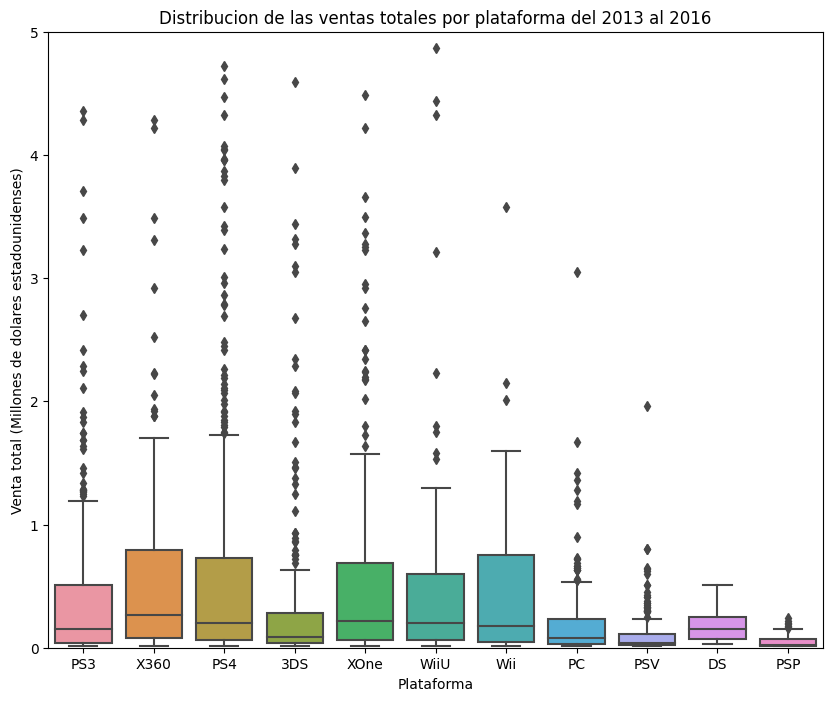

In [252]:
# Diagrama de cajas con ajuste de outliders para mejor visualizacion
plt.figure(figsize = (10,8))
sns.boxplot(data = games_data_filter, x= "platform", y= "total_sales")
plt.title("Distribucion de las ventas totales por plataforma del 2013 al 2016")
plt.ylabel("Venta total (Millones de dolares estadounidenses)")
plt.xlabel("Plataforma")
plt.ylim(0, 5)
plt.show()

Podemos observar que el promedio varia en las plataformas y los datos mayormente se distribuyen por encima de la media en casi todas. Tambien es notable la presencia de varios outliners lo que sugiere que varios juegos tuvieron ventas que superaron por mucho al rango de los bigotes del diagrama de cajas

###  Correlacion entre las reseñas y las ventas de PS4

Las reseñas son un dato importante debido a que aportan informacion de la calidad de algun juego. De este modo analizaremos las reseñas de los usuarios y profesionales para los juegos de la plataforma PS4 que es lider en ventas

In [253]:
# Filtrar datos solo de la plataforma PS
ps4_analytics = games_data_filter.query("platform == 'PS4'")

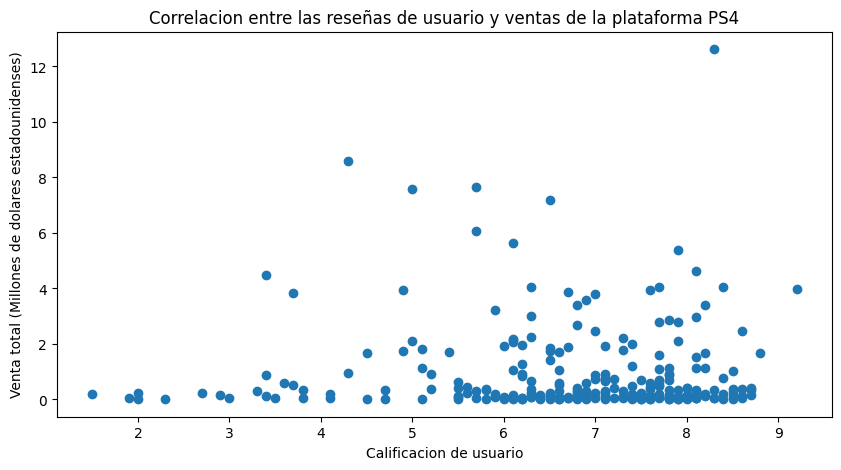

Correlación entre reseñas de usuarios y ventas: -0.031957110204556424


In [254]:
# Filtra filas sin nan para user_Score
corr_userscore_sales = ps4_analytics.dropna(subset = ["user_score"])
# Distribucion de las ventas y reseñas del usuario
plt.figure(figsize = (10,5))
plt.scatter(data = corr_userscore_sales, x = "user_score", y ="total_sales" )
plt.title("Correlacion entre las reseñas de usuario y ventas de la plataforma PS4")
plt.ylabel("Venta total (Millones de dolares estadounidenses)")
plt.xlabel("Calificacion de usuario")
plt.show()

# Correlacion 
corr_user = corr_userscore_sales["user_score"].corr(corr_userscore_sales["total_sales"])
print(f"Correlación entre reseñas de usuarios y ventas: {corr_user}")

La correlación es muy cercana a 0, lo que indica que no existe una relación lineal significativa entre las críticas de los usuarios y las ventas totales. De esta forma el resultado sugiere que las críticas de los usuarios no son un buen predictor de las ventas totales. Otros factores pueden estar influyendo en las ventas más que las calificaciones de los usuarios.

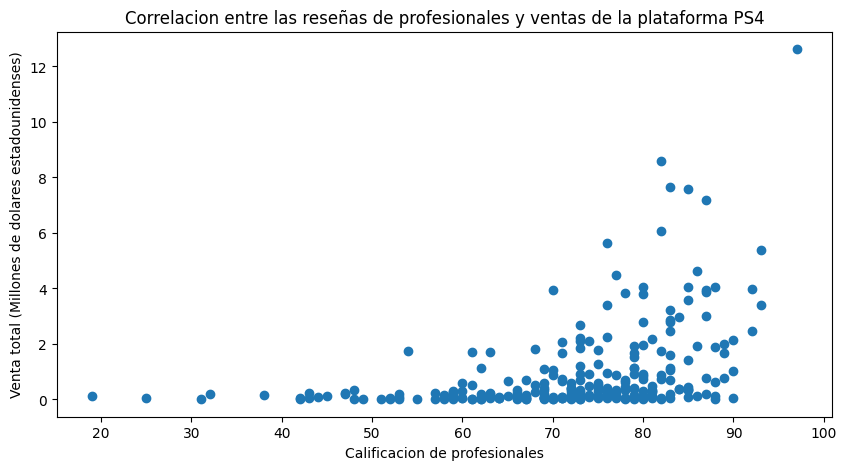

Correlación entre reseñas de profesionales y ventas: 0.40656790206178095


In [255]:
# Filtra filas sin nan para critic_Score
corr_criticscore_sales = ps4_analytics.dropna(subset = ["critic_score"])
# Distribucion de las ventas y reseñas de profesionales
plt.figure(figsize = (10,5))
plt.scatter(data = corr_criticscore_sales, x = "critic_score", y ="total_sales" )
plt.title("Correlacion entre las reseñas de profesionales y ventas de la plataforma PS4")
plt.ylabel("Venta total (Millones de dolares estadounidenses)")
plt.xlabel("Calificacion de profesionales")
plt.show()

# Correlacion 
corr_user = corr_criticscore_sales['critic_score'].corr(corr_criticscore_sales['total_sales'])
print(f'Correlación entre reseñas de profesionales y ventas: {corr_user}')

Obtenemos una correlación positiva moderada entre las críticas de los profesionales y las ventas totales, aunque no es una correlación fuerte (más cerca de 1), sí es lo suficientemente significativa como para sugerir que las críticas de los profesionales tienen un impacto en las ventas.

A diferencia de las reseñas de usuarios, las opiniones de los críticos parecen tener un impacto más notable en las ventas de los juegos. Esto podría deberse a que los consumidores confían más en las críticas de expertos, o, que estas reseñas afectan la visibilidad y la percepción pública de los juegos, lo que a su vez impulsa o no las ventas.

### Comparacion de los 10 juegos con mas ventas en PS4 en distintas plataformas

Hemos analizado la correlacion de las reseñas y ventas para la plataforma lider que es PS4. Ahora analizaremos los 10 juegos mas vendidos en PS4 y compararemos sus ventas totales en otras plataformas.

Esta es la lista de juegos:

In [256]:
# Top juegos mas vendidos de ps4
top_games_ps4 = ps4_analytics.groupby("name")["total_sales"].sum().sort_values(ascending=False).reset_index().loc[:9]
top_games_ps4 = top_games_ps4["name"]
top_games_ps4

0         Call of Duty: Black Ops 3
1                Grand Theft Auto V
2                           FIFA 16
3      Star Wars Battlefront (2015)
4    Call of Duty: Advanced Warfare
5                           FIFA 17
6                         Fallout 4
7                           FIFA 15
8                           Destiny
9        Uncharted 4: A Thief's End
Name: name, dtype: object

In [257]:
# Filtrar por el nombre de los 10 juegos mas vendidos en PS4
games_analytics = games_data_filter.query("name in @top_games_ps4")
games_in_platform = pd.pivot_table(data=games_analytics, index= "name", columns = "platform", values = "total_sales").reset_index()
display(games_in_platform)
# Convertir el DataFrame a formato largo
games_in_platform_melted = games_in_platform.melt(id_vars="name", var_name='platform', value_name='total_sales').dropna()

platform,name,3DS,PC,PS3,PS4,PSV,Wii,X360,XOne
0,Call of Duty: Advanced Warfare,NaN,0.41,4.36,7.66,NaN,NaN,4.28,5.26
1,Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,NaN,NaN,1.70,7.39
2,Destiny,NaN,NaN,1.61,5.64,NaN,NaN,1.92,3.37
3,FIFA 15,0.46,0.29,4.28,6.08,0.6,0.56,2.92,2.18
4,FIFA 16,NaN,0.20,2.70,8.58,NaN,NaN,1.57,3.25
5,FIFA 17,NaN,0.12,0.73,7.60,NaN,NaN,0.38,2.65
6,Fallout 4,NaN,1.28,NaN,7.17,NaN,NaN,NaN,4.22
7,Grand Theft Auto V,NaN,1.17,21.05,12.62,NaN,NaN,16.27,5.47
8,Star Wars Battlefront (2015),NaN,0.55,NaN,7.98,NaN,NaN,NaN,3.66
9,Uncharted 4: A Thief's End,NaN,NaN,NaN,5.39,NaN,NaN,NaN,NaN


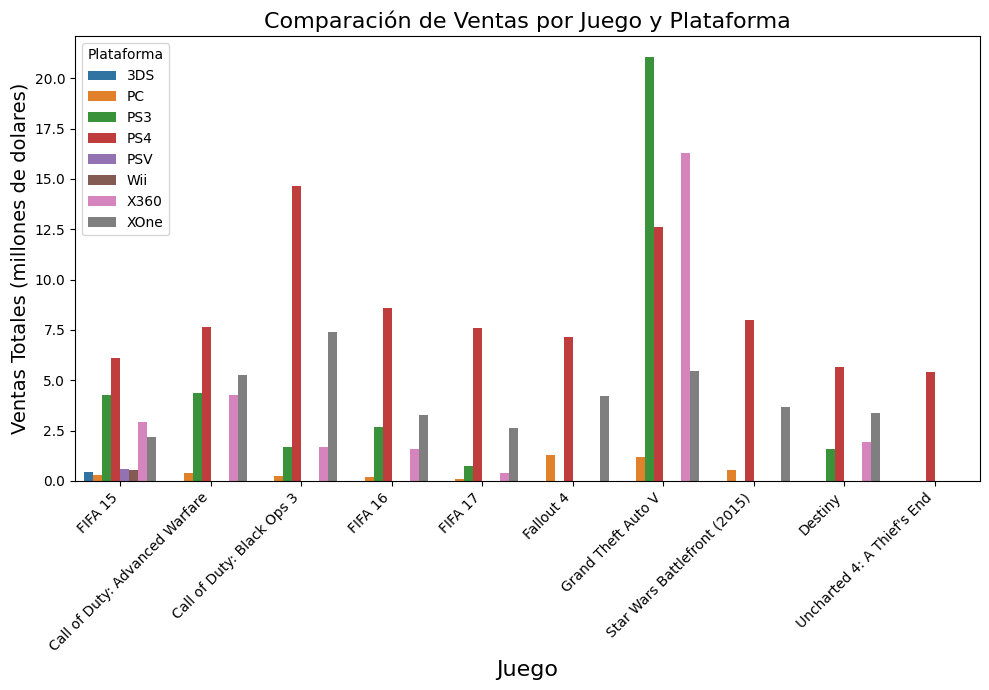

In [258]:
plt.figure(figsize=(10, 7))

# Crear el gráfico de barras
sns.barplot(data=games_in_platform_melted, x='name', y='total_sales', hue='platform')
plt.title('Comparación de Ventas por Juego y Plataforma', fontsize=16)
plt.xlabel('Juego', fontsize=16)
plt.ylabel('Ventas Totales (millones de dolares)',fontsize=14)
plt.legend(title='Plataforma')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Podemos observar en este grafio que la plataforma PS4 es la que mas ventas totales tiene para todos los juegos, a excepcion de Grand Theft Auto V donde PS3 tuvo la mayor venta total superando significativamente a PS4 y seguido por Xbox360. Podriamos decir que mayormente la segunda plataforma que mas ventas tiene en estos juegos es XboxOne.

En estos resultados puede influenciar el hecho de que algunos juegos pueden tener mas o menos compatibilidad con ciertas plataformas o no tenerla, como en el caso de 3DS, PSV o WII que solo hay datos para FIFA 15.

###  Rentabilidad  por genero

Para conocer cuales son los generos mas rentables, analisaremos a partir de sus ventas totales.


In [259]:
genre_analytics = games_data_filter.groupby("genre")["total_sales"].sum().sort_values(ascending=False).reset_index()
genre_analytics

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


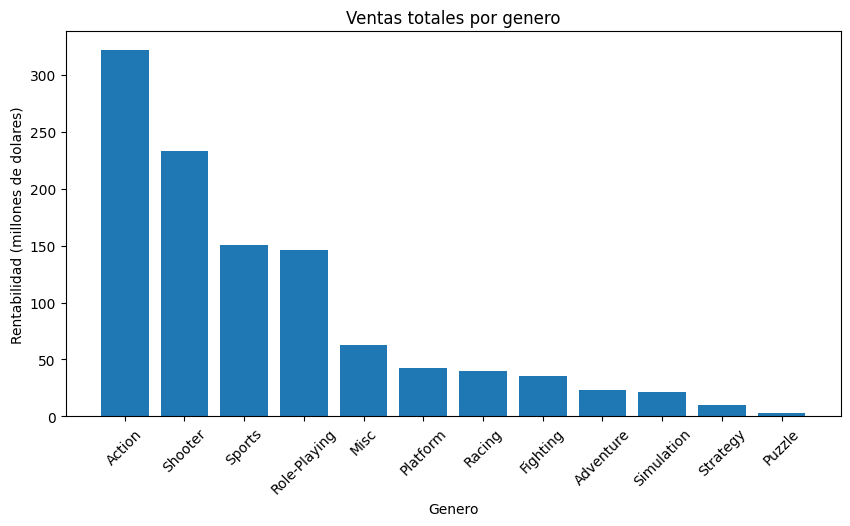

In [260]:
# Rentabilidad de los juegos por genero
plt.figure(figsize = (10,5))
plt.bar(genre_analytics["genre"],genre_analytics["total_sales"])
plt.title("Ventas totales por genero")
plt.ylabel("Rentabilidad (millones de dolares)")
plt.xlabel("Genero")
plt.xticks(genre_analytics.genre, rotation=45)
plt.show()

Con este grafico vemos que los generos mas rentables son de accion y disparos, seguidos por deportes y role-play. En base a solo sus ventas totales, podriamos decir que el genero mas rentable en general es accion, pero esto podria deberse a que existen mas juegos en ese genero respecto a los demas, de este modo podria no reflejar la rentabilidad real.

In [261]:
# Cantidad de juegos de cada genero
n_games_genre = games_data_filter.groupby("genre")["name"].count().sort_values(ascending=False).reset_index()
n_games_genre

,genre,name
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


Considerando esto crearemos un grafico con la media de las ventas totales por juego para tener una comparación válida de la rentabilidad entre géneros con diferente número de juegos

In [262]:
# Tabla con el promedio de venta por juego de cada genero
proportion_df =  games_data_filter.groupby("genre")["total_sales"].mean().sort_values(ascending=False).reset_index()
proportion_df = proportion_df.rename(columns={"total_sales":"mean"})
proportion_df

,genre,mean
0,Shooter,1.245882
1,Sports,0.703972
2,Platform,0.576081
3,Role-Playing,0.499623
4,Racing,0.469294
5,Fighting,0.441375
6,Action,0.420196
7,Misc,0.405290
8,Simulation,0.350968
9,Puzzle,0.186471


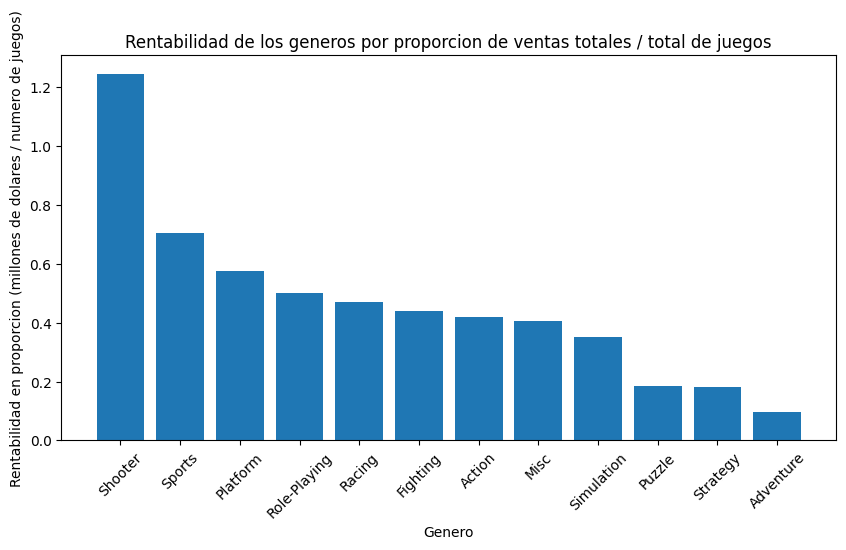

In [263]:
plt.figure(figsize = (10,5))
# Grafico
plt.bar(proportion_df["genre"],proportion_df["mean"])
plt.title("Rentabilidad de los generos por proporcion de ventas totales / total de juegos")
plt.ylabel("Rentabilidad en proporcion (millones de dolares / numero de juegos)")
plt.xlabel("Genero")
plt.xticks(genre_analytics.genre, rotation=45)
plt.show()

Podemos ver como el orden de los generos ha cambiado, tenemos que proporcionalmente al numero de juegos, el genero de disparos es el mas rentable, este seguido de deportes con una diferencia significativa.

### Conclusiones importantes de los datos relevantes a partir del 2013

La PlayStation 4 (PS4) se destaca como la plataforma líder en ventas, con un crecimiento notable en comparación con otras plataformas. A pesar de la fuerte presencia inicial de plataformas como PS3, Xbox 360, y Nintendo 3DS, estas experimentan una disminución en sus ventas, indicando que ya no seran rentables en el futuro. 

Los análisis nos dicen que tenemos juegos con ventas destacablemente altas, superando significativamente la media, lo que sugiere que ciertos títulos son excepciones notables en sus respectivas plataformas.

Además, las críticas de profesionales influyen más en las ventas que las reseñas de usuarios, afectando la percepción pública de los juegos. 

El género de disparos seria el más rentable, especialmente en relación con la cantidad de juegos disponibles, seguido por el género de deportes.

## Analisis por regiones

Sabemos que en nuestros datos tenemos informacion de las ventas de los juegos en distintas regiones, como lo son Norteamerica, Europa, Japon y otras, con esto analizaremos cuales son las principales plataformas y generos, ademas de la inlfuencia que tiene la calificacion ESRB en las ventas, todo esto para las 3 primeras regiones.

### Principales plataformas

Se han seleccionado las 5 principales plataformas para cada region y se analizaran mostrando una tabla y grafica por cada region.

In [264]:
top_5_platform_na = games_data_filter.groupby("platform")["na_sales"].sum().sort_values(ascending=False).reset_index().loc[:4]
top_5_platform_eu = games_data_filter.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).reset_index().loc[:4]
top_5_platform_jp = games_data_filter.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).reset_index().loc[:4]
display(top_5_platform_na)
display(top_5_platform_eu)
display(top_5_platform_jp)

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


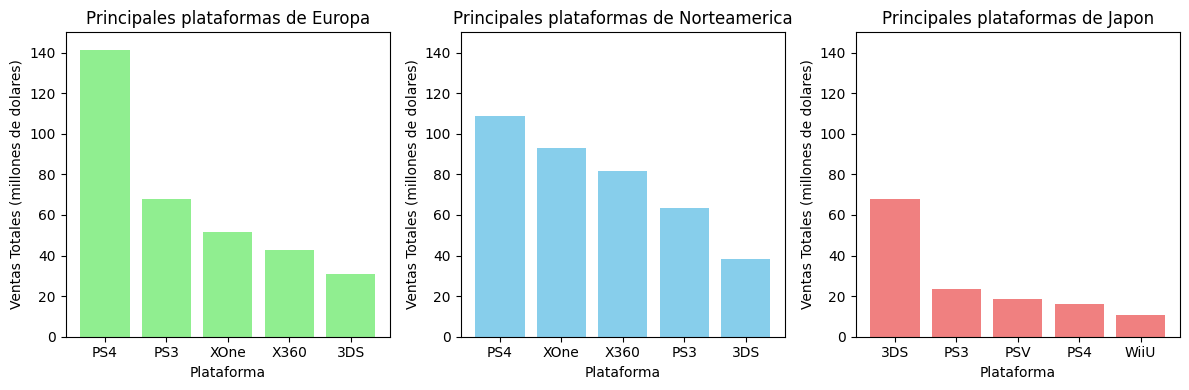

In [265]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico europa
ax[0].bar(top_5_platform_eu['platform'], top_5_platform_eu['eu_sales'], color='lightgreen')
ax[0].set_title('Principales plataformas de Europa')
ax[0].set_xlabel('Plataforma')
ax[0].set_ylabel('Ventas Totales (millones de dolares)')
ax[0].set_ylim(0, 150)  # Ajustar el rango de y

# Gráfico norteamerica
ax[1].bar(top_5_platform_na['platform'], top_5_platform_na['na_sales'], color='skyblue')
ax[1].set_title('Principales plataformas de Norteamerica')
ax[1].set_xlabel('Plataforma')
ax[1].set_ylabel('Ventas Totales (millones de dolares)')
ax[1].set_ylim(0, 150 )  # Ajustar el rango de y

# Gráfico japon
ax[2].bar(top_5_platform_jp['platform'], top_5_platform_jp['jp_sales'], color='lightcoral')
ax[2].set_title('Principales plataformas de Japon')
ax[2].set_xlabel('Plataforma')
ax[2].set_ylabel('Ventas Totales (millones de dolares)')
ax[2].set_ylim(0, 150)  # Ajustar el rango de y

# Ajustar los espacios entre los gráficos
plt.tight_layout()

plt.show()

Podemos observar que para norteamerica y europa las principales plataformas son las mismas, siendo para ambas PS4 la que genera mas ventas totales, en europa playstation es lider por mucho con su PS4 seguido con una diferencia significativa por PS3 y XboxOne. En norteamerica las plataformas no tienen diferencias significativas como en el caso de europa, es lider PS4 seguido de XboxOne y Xbox360, tenemos una mayor presencia de Xbox en comparacion con europa. Para Japon es un caso distinto ya que su principal plataforma es 3DS de nintendo cosa que en las otras regiones era la que menos ventas totales tuvo, cabe señalar que Xbox no es una plataforma principal, ademas, PSV y WiiU se encuentran entre las principales plataformas, cosa que en norteamerica y europa no sucedia.

### Principales generos

Se han seleccionado los 5 principales generos para cada region y se analizaran mostrando una tabla y grafica por cada region.

In [266]:
top_5_genre_na = games_data_filter.groupby("genre")["na_sales"].sum().sort_values(ascending=False).reset_index().loc[:4]
top_5_genre_eu = games_data_filter.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).reset_index().loc[:4]
top_5_genre_jp = games_data_filter.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).reset_index().loc[:4]
display(top_5_genre_na)
display(top_5_genre_eu)
display(top_5_genre_jp)

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


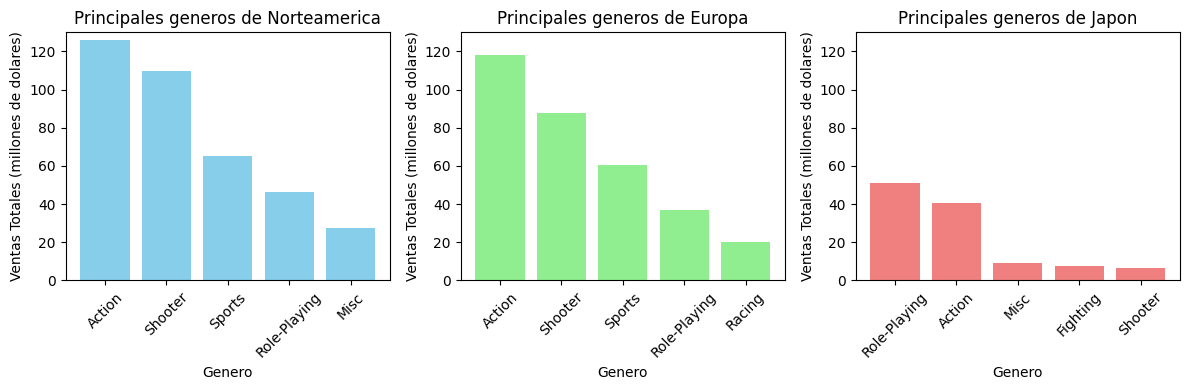

In [267]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 

# Gráfico norteamerica
ax[0].bar(top_5_genre_na['genre'], top_5_genre_na['na_sales'], color='skyblue')
ax[0].set_title('Principales generos de Norteamerica')
ax[0].set_xlabel('Genero')
ax[0].set_ylabel('Ventas Totales (millones de dolares)')
ax[0].tick_params(axis='x', rotation=45) 
ax[0].set_ylim(0, 130 )  # Ajustar el rango de y

# Gráfico europa
ax[1].bar(top_5_genre_eu['genre'], top_5_genre_eu['eu_sales'], color='lightgreen')
ax[1].set_title('Principales generos de Europa')
ax[1].set_xlabel('Genero')
ax[1].set_ylabel('Ventas Totales (millones de dolares)')
ax[1].tick_params(axis='x', rotation=45) 
ax[1].set_ylim(0, 130)  # Ajustar el rango de y

# Gráfico japon
ax[2].bar(top_5_genre_jp['genre'], top_5_genre_jp['jp_sales'], color='lightcoral')
ax[2].set_title('Principales generos de Japon')
ax[2].set_xlabel('Genero')
ax[2].set_ylabel('Ventas Totales (millones de dolares)')
ax[2].tick_params(axis='x', rotation=45) 
ax[2].set_ylim(0, 130)  # Ajustar el rango de y

# Ajustar los espacios entre los gráficos
plt.tight_layout()

plt.show()

Podemos ver que en norteamerica y europa los generos de accion y disparos, son los generos principales, seguido de deportes y role-play. Caso distinto para japon donde role-play y accion son los generos principales seguido con una diferecia significativa por misc y peleas.

### Influencia de la calificacion ESRB en las ventas

Se ha agrupado por la calificacion ESRB y se analizara el total de ventas de cada clasificacion para de este modo conocer si afecta cierta clasificacion en la ventas regionales. Tenemos las siguientes clasificaciones:

Todos (E): Contenido adecuado para todas las edades. Puede contener un mínimo de dibujos animados, fantasía o violencia leve.

Todos +10(E10+): Material idóneo para edades de 10 años o más años. Las obras dentro de esta categoría generalmente contienen animaciones, más violentas, sangre, insultos regulares o en temas sugerentes

Adolecentes (T): Contenido adecuado para adolescentes entre 13 años. Los productos de este género generalmente contienen sangre moderada humor cruel, temas sugestivos o violencia gráfica moderada y, en la mayoría de las veces, juegos de azar/apuestas simulados

Maduro +17(M): Artículos que pueden contener material pertinente para edades de 17 o más años. Las obras de esta categoría generalmente muestran violencia intensa o realista, sangre fuerte, temas de horror, contenido sexual, insultos vulgares, uso de tabaco y alcohol.

In [268]:
sales_per_rating_na = games_data_filter.groupby("rating")["na_sales"].sum().sort_values(ascending=False).reset_index()
sales_per_rating_eu = games_data_filter.groupby("rating")["eu_sales"].sum().sort_values(ascending=False).reset_index()
sales_per_rating_jp = games_data_filter.groupby("rating")["jp_sales"].sum().sort_values(ascending=False).reset_index()
display(sales_per_rating_na)
display(sales_per_rating_eu)
display(sales_per_rating_jp)

,rating,na_sales
0,M,165.21
1,E,79.05
2,E10+,54.24
3,T,49.79


,rating,eu_sales
0,M,145.32
1,E,83.36
2,E10+,42.69
3,T,41.95


,rating,jp_sales
0,T,20.59
1,E,15.14
2,M,14.11
3,E10+,5.89


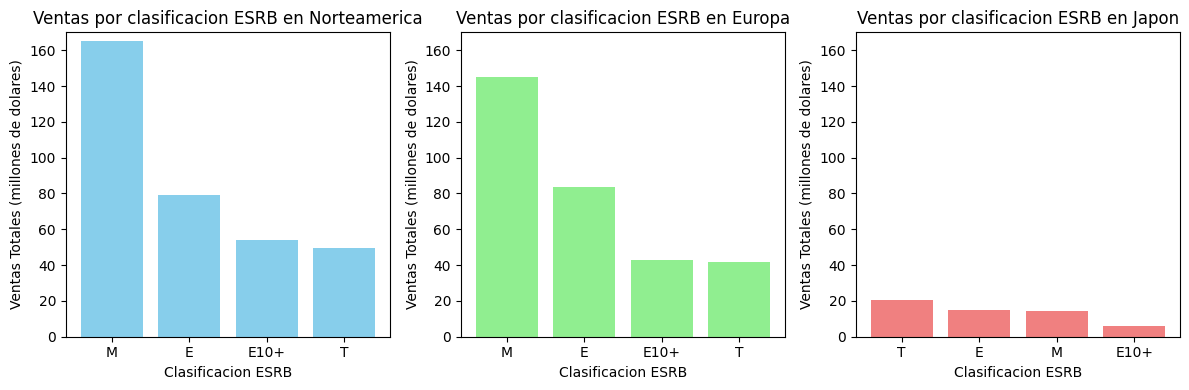

In [269]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 

# Gráfico norteamerica
ax[0].bar(sales_per_rating_na['rating'], sales_per_rating_na['na_sales'], color='skyblue')
ax[0].set_title('Ventas por clasificacion ESRB en Norteamerica')
ax[0].set_xlabel('Clasificacion ESRB')
ax[0].set_ylabel('Ventas Totales (millones de dolares)')
ax[0].set_ylim(0, 170 )  # Ajustar el rango de y

# Gráfico europa
ax[1].bar(sales_per_rating_eu['rating'], sales_per_rating_eu['eu_sales'], color='lightgreen')
ax[1].set_title('Ventas por clasificacion ESRB en Europa')
ax[1].set_xlabel('Clasificacion ESRB')
ax[1].set_ylabel('Ventas Totales (millones de dolares)') 
ax[1].set_ylim(0, 170)  # Ajustar el rango de y

# Gráfico japon
ax[2].bar(sales_per_rating_jp['rating'], sales_per_rating_jp['jp_sales'], color='lightcoral')
ax[2].set_title('Ventas por clasificacion ESRB en Japon')
ax[2].set_xlabel('Clasificacion ESRB')
ax[2].set_ylabel('Ventas Totales (millones de dolares)') 
ax[2].set_ylim(0, 170)  # Ajustar el rango de y

# Ajustar los espacios entre los gráficos
plt.tight_layout()

plt.show()

Podemos observar que la clasificacion "Maduro(M)" tanto en norteamerica como en europa es la que mas ventas totales a generado, seguido por "Todos(E)". Enn el caso de Japon "Adolecentes(T)" es la que mas ventas totales ha tenido seguido muy cerca por "Todos(E)" y "Maduro(M)".

### Conclusiones importantes del analisis por regiones

Las preferencias de plataformas, géneros y clasificaciones de videojuegos varían significativamente entre Norteamérica, Europa y Japón, reflejando diferencias culturales y de mercado. En Norteamérica y Europa, la PlayStation 4 domina las ventas, con una fuerte presencia de Xbox especialmente en Norteamérica. En Japón, Nintendo 3DS lidera. En cuanto a géneros, los juegos de acción y disparos son los más populares en Norteamérica y Europa, mientras que en Japón predominan los géneros de role-play y acción. Finalmente, La clasificación "Maduro (M)" es la más vendida en Norteamérica y Europa, mientras que en Japón, los juegos clasificados como "Adolescentes (T)" lideran en ventas, seguidos de cerca por los juegos clasificados para "Todos (E)" y "Maduro (M)".

## Prueba de hipotesis estadisticas

Con el fin de comparar las calificaciones de los usuarios, probaremos t-test_ind de la libreria de scipy para conocer si el promedio de las calificaciones de dos muestras que nos interesan comparar son igules o significativamente distintas ademas de profundizar en la distribucion de las mismas.

### Comparacion del promedio de las calificaciones de los usuarios para las plataformas de XboxOne y PC

Al querer comparar las calificaciones de los usuarios para las plataformas de XboxOne y pc se formularon las siguientes hipotesis nula y alternativa.

Hipotesis nula(H0) : Las calificaciones promedio de los usuarios de las plataformas XboxOne y PC son iguales.

Hipotesis alternativa(H1) : Las calificaciones promedio de los usuarios de las plataformas XboxOne y PC son distintas.

Para realizar esta prueba estadistica usaremos t-test_ind, pero antes de realizarlo, haremos la prueba de levene a las muestras para conocer si tienen varianzas iguales y en base a este resultado setearemos el parametro "equal_var" en la prueba de t-test_ind.

####  Conocer si la varianza de las calificaciones de los usuarios para las plataformas de XboOne y PC son iguales o no

Podemos obtener de forma secilla la varianza y la desviacion estandar de nuestras muestras

In [270]:
# Muestras de interes
sample_xboxone = games_data_filter.query("platform == 'XOne'")["user_score"].dropna()
sample_pc = games_data_filter.query("platform == 'PC'")["user_score"].dropna()
# Mostrar la varianza y desviacion estandar
display(f"La varianza de las calificaciones para XboxOnes es: {sample_xboxone.var()} y su desviacion estandar es de : {sample_xboxone.std()}")
display(f"La varianza de las calificaciones para PC es: {sample_pc.var()} y su desviacion estandar es de : {sample_pc.std()}")

'La varianza de las calificaciones para XboxOnes es: 1.9069968429360695 y su desviacion estandar es de : 1.380940564592144'

'La varianza de las calificaciones para PC es: 3.035892752408882 y su desviacion estandar es de : 1.7423813452883619'

Con estos resultados podemos ver que la varianza no es igual, pero este valor puede verse afectado por la diferencia de tamaño de las muestras, debido a que podemos tener mas reseñas de una plataforma, esto puede deberse a una mayor poblacion de usuarios en una respecto a la otra.

De este modo optaremos por realizae la prueba de levene siendo nuestras hipotesis las siguentes:

Hipotesis nula(H0) : La varianza de las muestras se considera igual.

Hipotesis alternativa(H1) : La varianza de las muestras es significativamente distinta.

In [271]:
# test para conocer si existe igualdad de varianza o no de las muestras
alpha = 0.05

test = st.levene(sample_xboxone, sample_pc)
print(f"p_value: {test.pvalue}")

if test.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p_value: 0.003897553110130418
Podemos rechazar la hipotesis nula


Con este resultado concluimos en utilizar equal_var = False en nuestra prueba t-test_ind.

#### Prueba de hipotesis

Recordamos cuales son nuestras hipotesis a probar:

Hipotesis nula(H0) : Las calificaciones promedio de los usuarios de las plataformas XboxOne y PC son iguales.

Hipotesis alternativa(H1) : Las calificaciones promedio de los usuarios de las plataformas XboxOne y PC son distintas.

In [272]:
alpha = 0.05

test = st.ttest_ind(sample_xboxone, sample_pc, equal_var = False)
print(f"p_value: {test.pvalue}")

if test.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p_value: 0.14759594013430463
No podemos rechazar la hipotesis nula


Con esta prueba concluimos que no podemos rechazar la hipotesis nula  de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

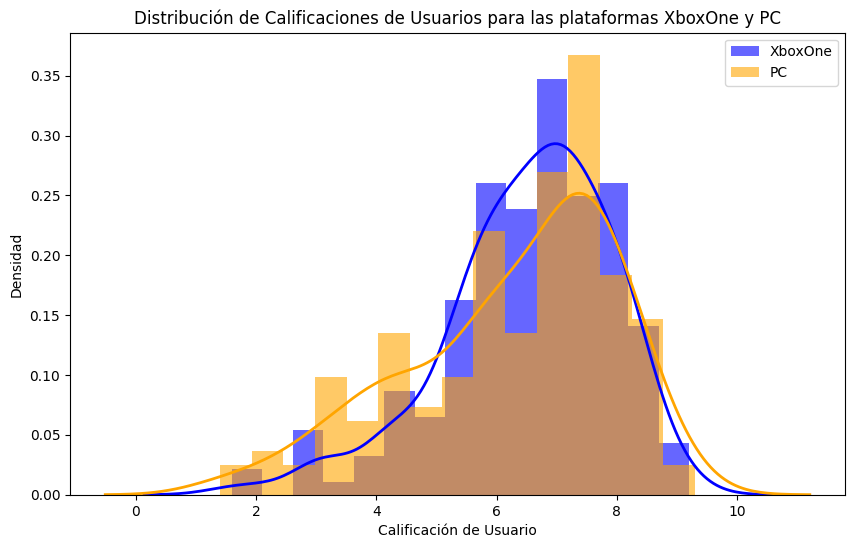

In [273]:
plt.figure(figsize=(10, 6))

plt.hist(sample_xboxone, bins=15, density=True, alpha=0.6, color='blue', label='XboxOne')
plt.hist(sample_pc, bins=15, density=True, alpha=0.6, color='orange', label='PC')
sns.kdeplot(sample_xboxone, color='blue', linewidth=2)
sns.kdeplot(sample_pc, color='orange', linewidth=2)
plt.title('Distribución de Calificaciones de Usuarios para las plataformas XboxOne y PC')
plt.xlabel('Calificación de Usuario')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

Con el grafico podemos apreciar que ambas plataformas tiene una distribucion muy parecida, por lo que los resultados de la prueba no son sorprendentes, dada las distribuciones de los datos podriamos esperar que el promedio de las calificaciones de las plataformas de XboxOne y PC no sean significativamente distintos.

### Comparacion del promedio de las calificaciones de los usuarios para  los géneros de acción y deportes

Al querer comparar las calificaciones de los usuarios para los generos de accion y deportes se formularon las siguientes hipotesis nula y alternativa.

Hipotesis nula(H0) : Las calificaciones promedio de los usuarios de los de generos accion y deportes son iguales

Hipotesis alternativa(H1) : Las calificaciones promedio de los usuarios de los generos accion y deportes son distintas

Para realizar esta prueba estadistica usaremos t-test_ind, pero antes de realizarlo, haremos la prueba de levene a las muestras para conoer si tienen varianzas iguales y en base a este resultado setearemos el parametro "equal_var" en la prueba de t-test_ind.

####  Conocer si la varianza de las calificaciones de los usuarios  para  los géneros de acción y deportes son iguales o no

Podemos obtener de forma secilla la varianza y la desviacion estandar de nuestras muestras de la siguiente forma.

In [274]:
# Muestras de interes
sample_genre_action = games_data_filter.query("genre == 'Action'")["user_score"].dropna()
sample_genre_sports = games_data_filter.query("genre == 'Sports'")["user_score"].dropna()
# Mostrar la varianza y desviacion estandar
display(f"La varianza de las calificaciones para el genero de accion es: {sample_genre_action.var()} y su desviacion estandar es de : {sample_genre_action.std()}")
display(f"La varianza de las calificaciones para el genero de deportes es: {sample_genre_sports.var()} y su desviacion estandar es de : {sample_genre_sports.std()}")

'La varianza de las calificaciones para el genero de accion es: 1.7693609042482705 y su desviacion estandar es de : 1.3301732609883083'

'La varianza de las calificaciones para el genero de deportes es: 3.180612814465409 y su desviacion estandar es de : 1.7834272663793747'

Con estos resultados podemos ver que la varianza no es igual, pero este valor puede verse afectado por la diferencia de tamaño de las muestras, lo mismo ocurrido el la prueba para las plataformas.

De este modo optaremos por realizae la prueba de levene siendo nuestras hipotesis las siguentes:

Hipotesis nula(H0) : La varianza de las muestras se considera igual.

Hipotesis alternativa(H1) : La varianza de las muestras es significativamente distinta.

In [275]:
# test para conocer si existe igualdad de varianza o no de las muestras
alpha = 0.05

test = st.levene(sample_genre_action, sample_genre_sports)
print(f"p_value: {test.pvalue}")

if test.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p_value: 4.2566688218274047e-07
Podemos rechazar la hipotesis nula


Con este resultado concluimos en utilizar equal_var = False en nuestra prueba t-test_ind.

#### Prueba de hipotesis

Recordamos cuales son nuestras hipotesis a probar:

Hipotesis nula(H0) : Las calificaciones promedio de los usuarios para los de generos accion y deportes son iguales

Hipotesis alternativa(H1) : Las calificaciones promedio de los usuarios para los generos accion y deportes son distintas

In [276]:
alpha = 0.05

test = st.ttest_ind(sample_genre_action, sample_genre_sports, equal_var = False)
print(f"p_value: {test.pvalue}")

if test.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p_value: 1.4460039700704315e-20
Podemos rechazar la hipotesis nula


Con este resultado podemos rechazar la hipotesis nula de que las calificaciones promedio de los usuarios para los de generos accion y deportes son iguales.

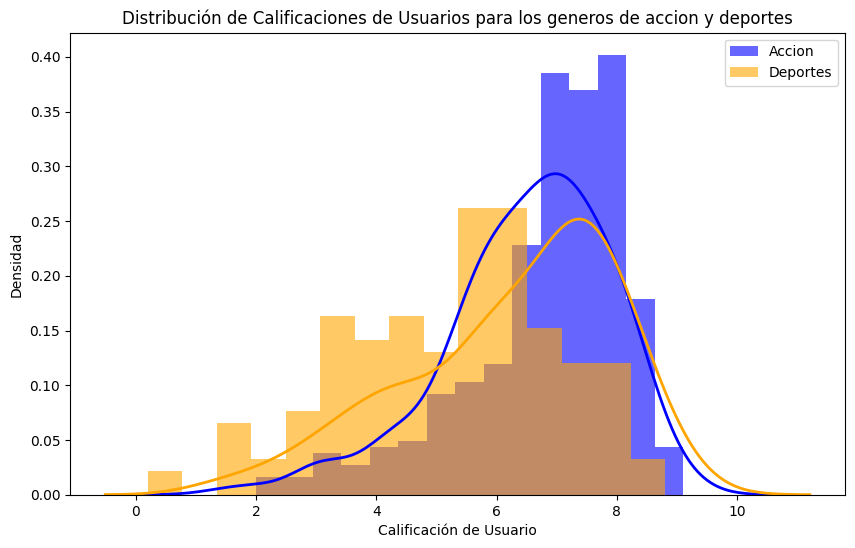

In [277]:
plt.figure(figsize=(10, 6))

plt.hist(sample_genre_action, bins=15, density=True, alpha=0.6, color='blue', label='Accion')
plt.hist(sample_genre_sports, bins=15, density=True, alpha=0.6, color='orange', label='Deportes')
sns.kdeplot(sample_xboxone, color='blue', linewidth=2)
sns.kdeplot(sample_pc, color='orange', linewidth=2)
plt.title('Distribución de Calificaciones de Usuarios para los generos de accion y deportes')
plt.xlabel('Calificación de Usuario')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

Con el grafico podemos apreciar que ambos generos tienen una distribucion de calificaciones notablemente diferente siendo que el genero accion se concentra mas para las calificaciones en torno a 6 y 8, mientras que para deportes no se concentra tanto, sino que es mas ancha la distribucion de calificaciones en torno a 3 y 8 , por lo que los resultados de la prueba no son sorprendentes, dada la distribucion de los datos podiamos esperar que sus medias fueran significativamente distintas y que el promedio de calificaciones para el genero de accion sea mayor al promedio para el genero de deportes

### Conclusiones importantes de las pruebas  estadisticas

Las pruebas estadísticas realizadas revelan diferencias y similitudes en las calificaciones promedio de los usuarios para distintas plataformas y géneros de videojuegos. En el caso de las plataformas Xbox One y PC, no se encontró una diferencia significativa en las calificaciones promedio, lo que sugiere que los usuarios perciben ambas plataformas de manera similar en términos de calidad. Esto se refuerza con las distribuciones de calificaciones, que son muy parecidas para ambas plataformas.

Por otro lado, al comparar los géneros de acción y deportes, sí se encontró una diferencia significativa en las calificaciones promedio. Los juegos de acción tienden a concentrarse en calificaciones más altas, entre 6 y 8, mientras que los juegos de deportes presentan una distribución más amplia y dispersa de calificaciones, entre 3 y 8. Este resultado es consistente con la expectativa de que el género de acción tiene un promedio de calificaciones superior al de deportes.

En ambas pruebas se observó que las varianzas de las muestras eran diferentes, lo que se tomó en cuenta al analizar los resultados.

## Conclusion general del proyecto

El análisis revela varios patrones clave que determinan el éxito de los videojuegos. La industria experimentó un notable crecimiento entre 1993 y 2012, alcanzando su apogeo en la década del 2000. Las plataformas siguen un ciclo de crecimiento y declive, con la PlayStation 4 (PS4) emergiendo como la líder en ventas a partir de 2013, mientras que otras plataformas como PS3, Xbox 360, y Nintendo 3DS muestran una disminución en su rentabilidad futura. Sin embargo, la PC se mantiene relevante a lo largo del tiempo.

Las preferencias de plataformas, géneros y clasificaciones de videojuegos varían considerablemente entre regiones, reflejando diferencias culturales. Mientras que la PS4 domina en Norteamérica y Europa, en Japón, Nintendo 3DS lidera. Los géneros de acción y disparos son los más populares en Occidente, mientras que en Japón, los géneros de role-play y acción predominan. Las críticas de profesionales tienen un impacto más significativo en las ventas que las reseñas de usuarios, y el género de disparos es el más rentable en términos de la cantidad de juegos disponibles.

Las pruebas estadísticas revelan que, aunque los usuarios perciben de manera similar la calidad de las plataformas Xbox One y PC, existen diferencias significativas en las calificaciones promedio entre los géneros de acción y deportes, con una ventaja clara para los juegos de acción. 

Este conjunto de insights proporciona una base sólida para identificar proyectos prometedores y planificar campañas publicitarias más efectivas, adaptadas a las características específicas de cada mercado y segmento